In [1]:
#Importação de bibliotecas
import torch
import torch.nn as nn
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import os,time, gc, pathlib

In [2]:
# Ler dataset
dataframe=[]
for dirname, _, filenames in os.walk ('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname,filename))
        path_file=os.path.join(dirname,filename)
        print(path_file)
        df=pd.read_csv(path_file,index_col=None, header=0)
        dataframe.append(df)
pollution_data=pd.concat(dataframe)
pollution_data

/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/kaggle/input/datasets/pedrohgmsantos/beijing-multi-site-air-quality/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv
/kaggle/input/datasets/ped

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [3]:
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [4]:
#Drop na coluna numero e renomear colunas
pollution_data.drop(["No"], axis=1, inplace=True)
pollution_data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
pollution_data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [5]:
#Valores nulos
pollution_data.isnull().sum()

Year            0
Month           0
Day             0
Hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
Temp          398
Press         393
DewP          403
Rain          390
WinDir       1822
WinSpeed      318
Station         0
dtype: int64

In [6]:
#Valores N/A
pollution_data.isna().sum()

Year            0
Month           0
Day             0
Hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
Temp          398
Press         393
DewP          403
Rain          390
WinDir       1822
WinSpeed      318
Station         0
dtype: int64

In [7]:
#Preenche valores nulos em colunas numericas com média para a coluna especifica
#Preenche os valores faltantes nas colunas de acordo com a média do mês
unique_Month = pd.unique(pollution_data.Month)

#Acha a média para cada mês de PM2_5
# Igualar os valores médios de PM2,5 aos valores ausentes em PM2_5 específicos para o mês
temp_data = pollution_data.copy()  # Criar temp_data para não perder data real
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']
for c in unique_Month:

    # criar filtro de mês
    Month_filtre = temp_data.Month == c
    # filtrar data por mês
    fitered_data = temp_data[Month_filtre]

    #encontrar a média de PM2_5 para cada mês
    for s in columns:
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): #encontra média por mês se existir
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: #encontra a média total se não houver no mês
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    #Sincronizar dados preenchidos com valores ausentes em PM2.5 para dados temporários.
    temp_data[Month_filtre] = fitered_data

# equiparar os dados temporários obsoletos à variável de dados real
pollution_data = temp_data.copy()

/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)
/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)
/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Missing Value in PM2.5 column fill with 94.66 when Month:3
Missing Value in PM10 column fill with 136.04 when Month:3
Missing Value in SO2 column fill with 28.0 when Month:3
Missing Value in NO2 column fill with 60.12 when Month:3
Missing Value in CO column fill with 1310.23 when Month:3
Missing Value in O3 column fill with 51.04 when Month:3
Missing Value in Temp column fill with 8.35 when Month:3
Missing Value in Press column fill with 1013.96 when Month:3
Missing Value in DewP column fill with -7.95 when Month:3
Missing Value in Rain column fill with 0.01 when Month:3
Missing Value in WinSpeed column fill with 1.98 when Month:3
Missing Value in PM2.5 column fill with 72.73 when Month:4
Missing Value in PM10 column fill with 116.96 when Month:4
Missing Value in SO2 column fill with 14.22 when Month:4
Missing Value in NO2 column fill with 47.28 when Month:4
Missing Value in CO column fill with 840.49 when Month:4
Missing Value in O3 column fill with 70.19 when Month:4
Missing Value in

/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)
/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)
/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Missing Value in WinSpeed column fill with 1.88 when Month:1
Missing Value in PM2.5 column fill with 87.57 when Month:2
Missing Value in PM10 column fill with 102.68 when Month:2
Missing Value in SO2 column fill with 28.32 when Month:2
Missing Value in NO2 column fill with 50.21 when Month:2
Missing Value in CO column fill with 1385.0 when Month:2
Missing Value in O3 column fill with 40.73 when Month:2
Missing Value in Temp column fill with 1.12 when Month:2
Missing Value in Press column fill with 1020.31 when Month:2
Missing Value in DewP column fill with -13.0 when Month:2
Missing Value in Rain column fill with 0.01 when Month:2
Missing Value in WinSpeed column fill with 2.01 when Month:2


/tmp/ipykernel_55/1549714579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[s] = fitered_data[s].fillna(mean)


In [8]:
# Preenche os valores nulos nas colunas categóricas com o modo específico para cada coluna.

# Preenche os dados em falta na coluna WinDir com os valores de modo de acordo com a Estação.
unique_Station = pd.unique(pollution_data.Station)

# Encontrar o valor do modo de coluna na coluna WinDir de acordo com a coluna Station específica.
# Igualar os valores modais das colunas aos valores ausentes.
temp_data = pollution_data.copy()
columns = ["WinDir"]
for c in unique_Station:

    # Criar filtro de estação
    Station_filtre = temp_data.Station == c

    # filtrar data por estação
    filtered_data = temp_data[Station_filtre]

    # Modo de busca para WinDir específico para Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Sincronizar dados com valores ausentes no diretório WinDir com dados temporários.
    temp_data[Station_filtre] = filtered_data

#equiparar os dados temporários obsoletos à variável de dados real
pollution_data = temp_data.copy()

Missing Value in WinDir column fill with NE when Station:Guanyuan


/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Missing Value in WinDir column fill with NE when Station:Aotizhongxin
Missing Value in WinDir column fill with NE when Station:Wanliu
Missing Value in WinDir column fill with ENE when Station:Tiantan
Missing Value in WinDir column fill with NE when Station:Wanshouxigong


/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Missing Value in WinDir column fill with ENE when Station:Nongzhanguan
Missing Value in WinDir column fill with NNE when Station:Shunyi
Missing Value in WinDir column fill with NNW when Station:Changping
Missing Value in WinDir column fill with NNW when Station:Dingling


/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna(mode)
/tmp/ipykernel_55/3365355292.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Missing Value in WinDir column fill with NW when Station:Huairou
Missing Value in WinDir column fill with N when Station:Gucheng
Missing Value in WinDir column fill with ENE when Station:Dongsi


In [9]:
# Criação de um campo de data para análises posteriores, extraindo o dia da semana, mês, etc.
pollution_data['Date']=pd.to_datetime(pollution_data[['Year', 'Month', 'Day']])
pollution_data.tail()



,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date
35059,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,2017-02-28
35060,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,2017-02-28
35061,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,2017-02-28
35062,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,2017-02-28
35063,2017,2,28,23,30.0,71.0,11.0,87.0,1200.0,4.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Dongsi,2017-02-28


In [10]:
# Função para encontrar o dia da semana com base no campo de data.
import calendar
def findDay(date):
    dayname = calendar.day_name[date.weekday()]
    return dayname



In [11]:
pollution_data['DayNames'] = pollution_data['Date'].apply(lambda x: findDay(x))
pollution_data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date,DayNames
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01,Friday
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01,Friday
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01,Friday
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01,Friday
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01,Friday


In [12]:
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object        
 1

In [13]:
# informação estatistica sobre o dataset
pollution_data.drop(["Year", "Month", "Day", "Hour", "DayNames", "Date"], axis=1).describe()

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.766552,104.613484,15.816928,50.614391,1232.984577,57.222136,13.530570,1010.753847,2.481623,0.064444,1.729784
std,80.009899,91.093395,21.458894,34.658713,1136.591613,56.000446,11.437563,10.473051,13.795491,0.820626,1.245936
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,57.000000,83.000000,7.140000,44.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,20.000000,70.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


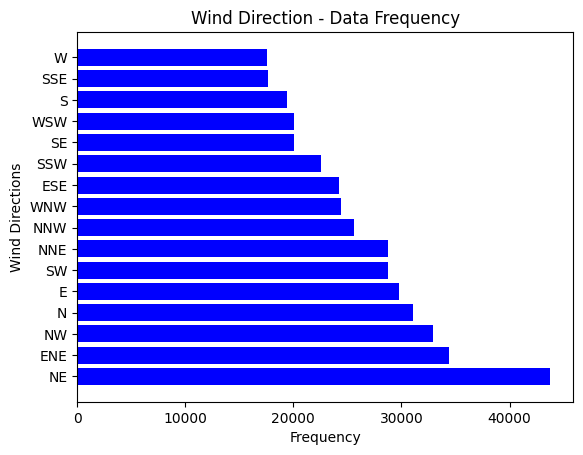

Number of Wind Direction 
WinDir
NE     43699
ENE    34376
NW     32902
N      31028
E      29752
SW     28756
NNE    28715
NNW    25606
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [14]:
# Numero de samples de WinDir
plt.figure()
plt.barh(pollution_data["WinDir"].value_counts().index, pollution_data["WinDir"].value_counts(), color = "b")

plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{pollution_data['WinDir'].value_counts()}")

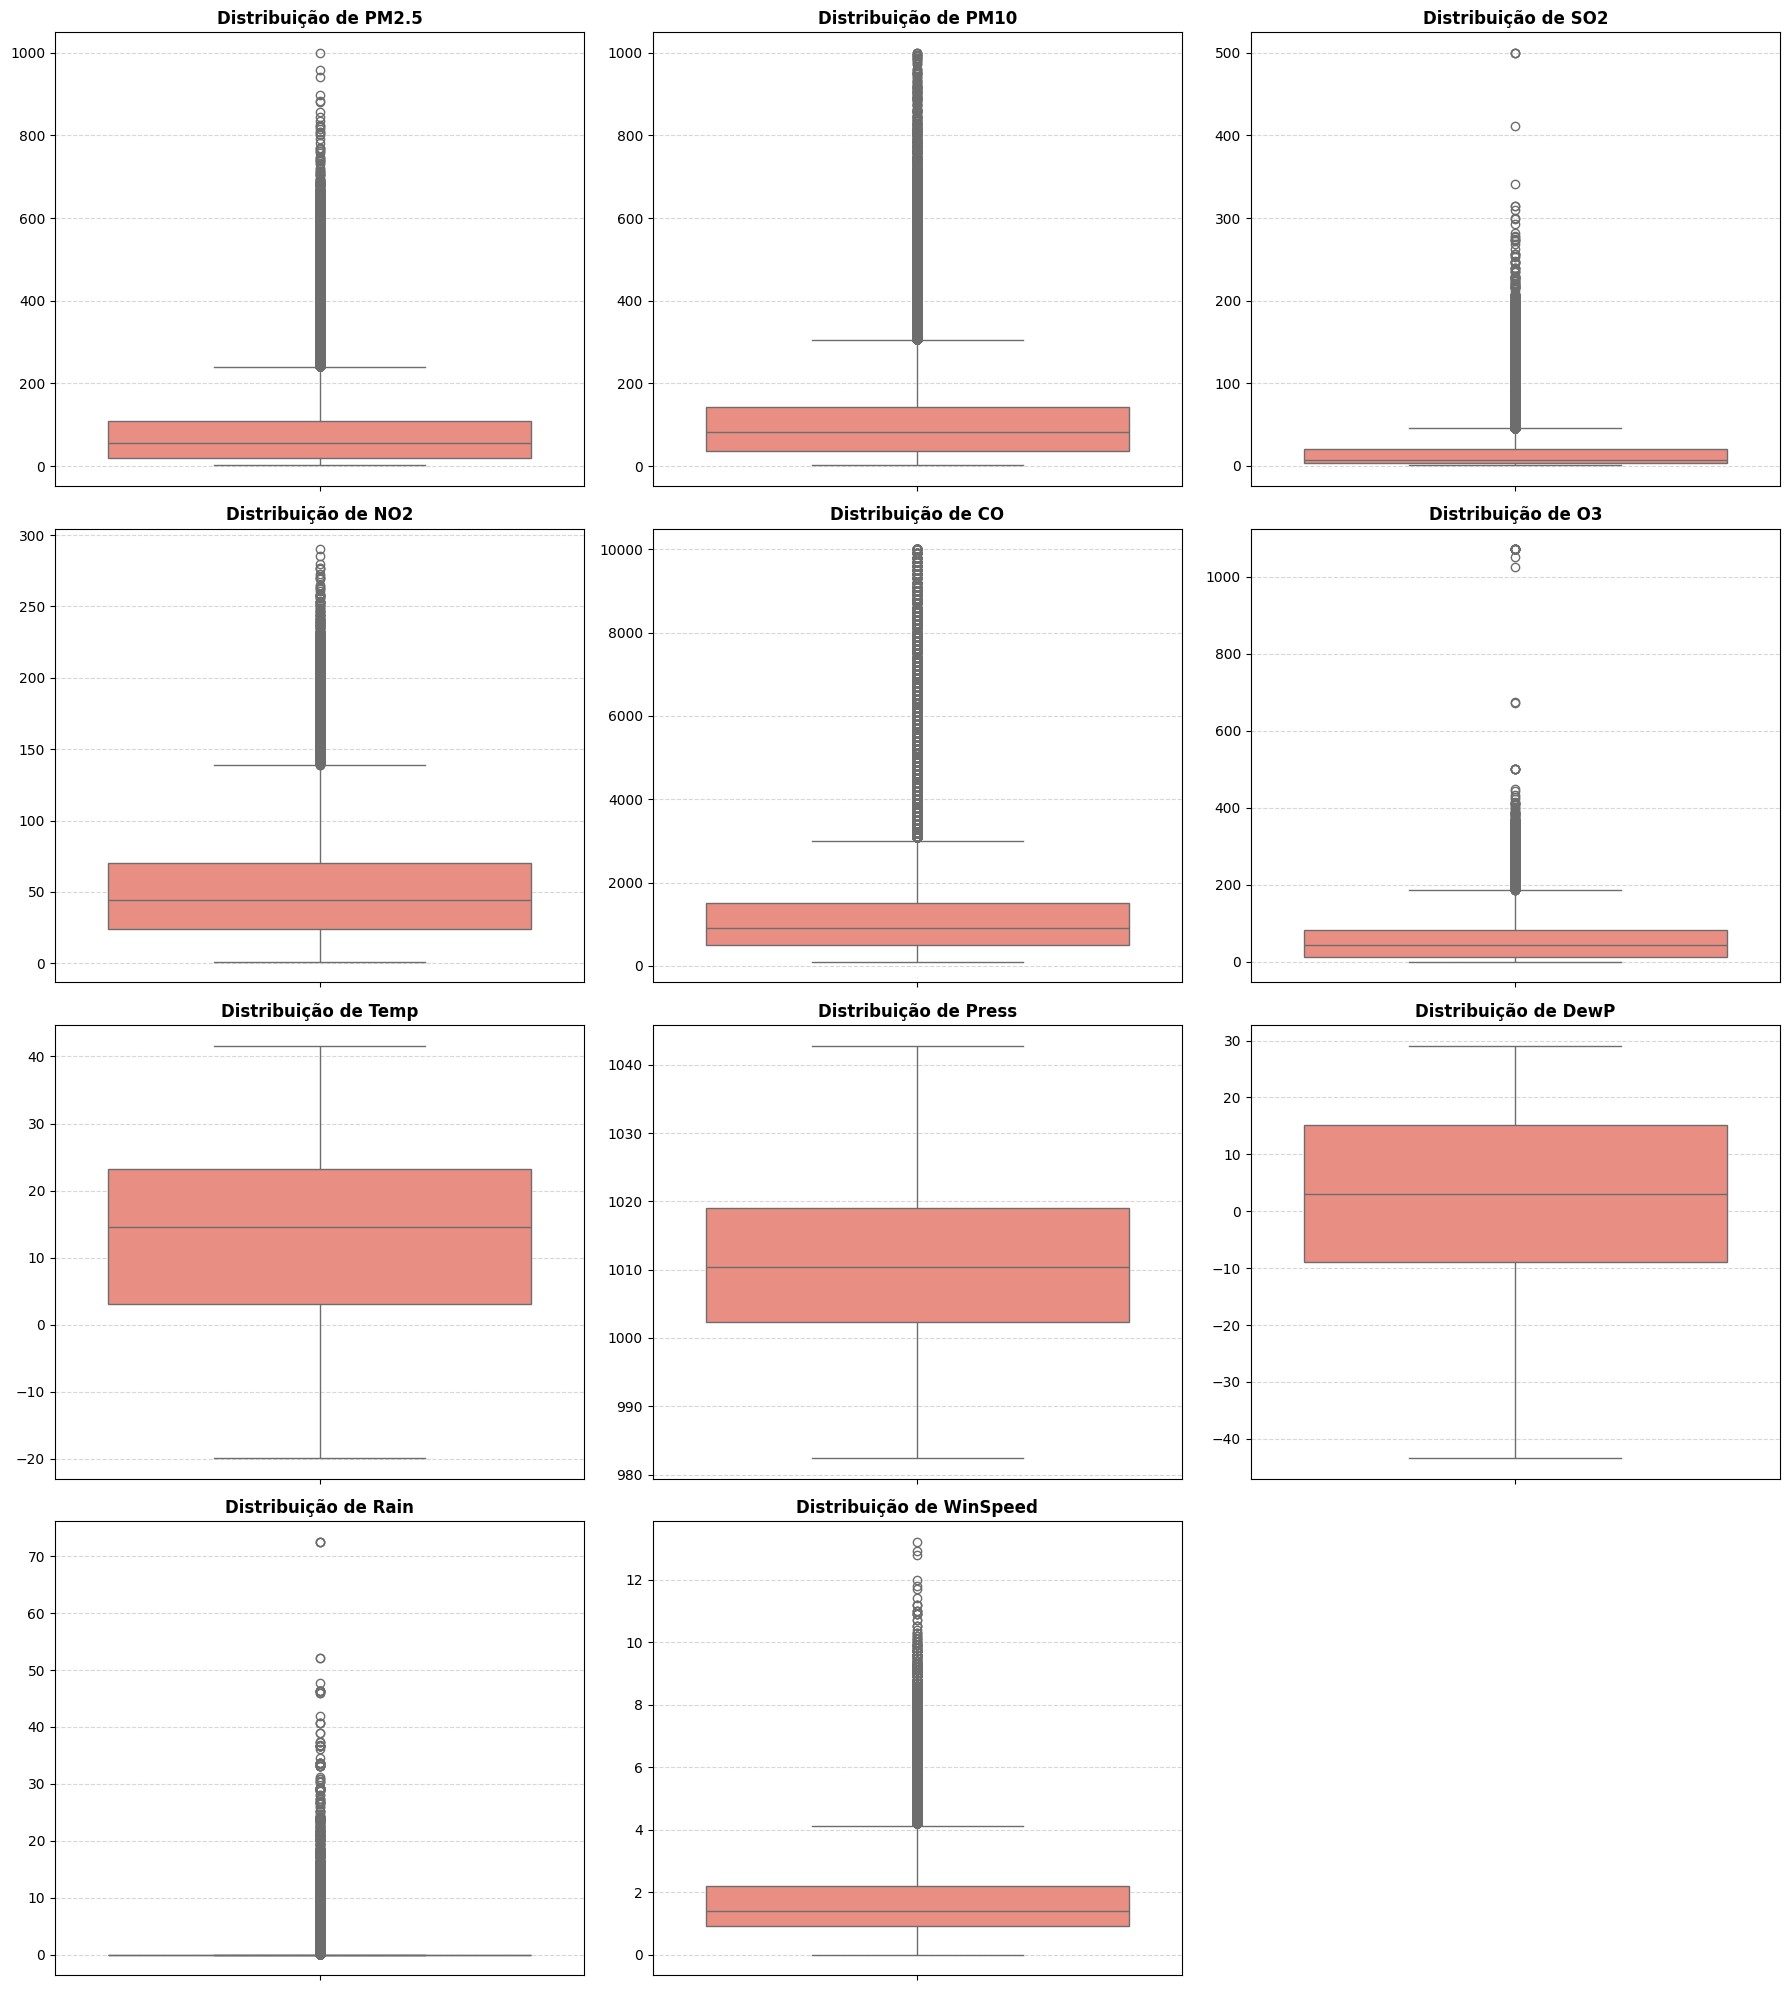

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Lista das variáveis numéricas contínuas (baseado no seu .describe())
cols_continuas = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed']

# 2. Configuração da grade (4 linhas e 3 colunas para acomodar as 11 variáveis)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten() # Transforma a matriz de eixos em uma lista simples

# 3. Loop para criar cada boxplot
for i, col in enumerate(cols_continuas):
    sns.boxplot(y=pollution_data[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# 4. Remover o último subplot que ficará vazio (já que temos 11 colunas para 12 espaços)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

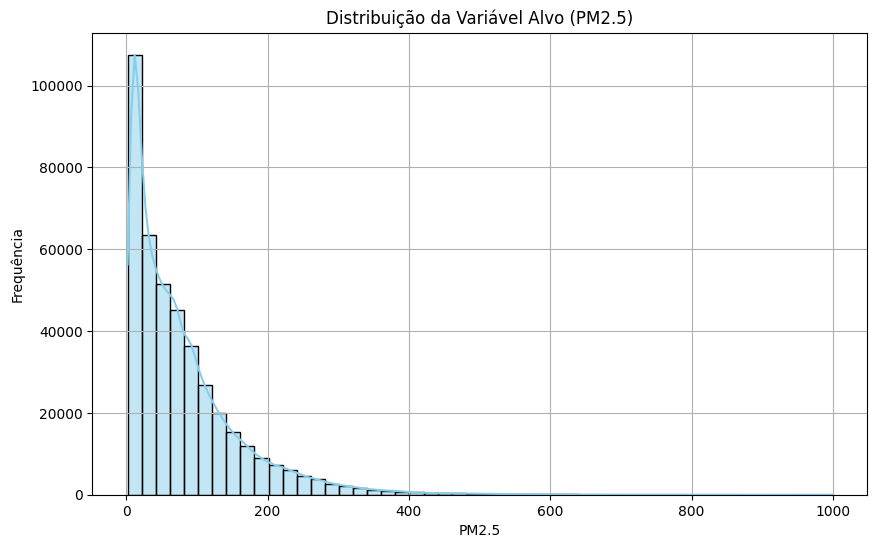

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(pollution_data['PM2.5'], kde=True, color='skyblue', bins=50)
plt.title('Distribuição da Variável Alvo (PM2.5)')
plt.xlabel('PM2.5')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

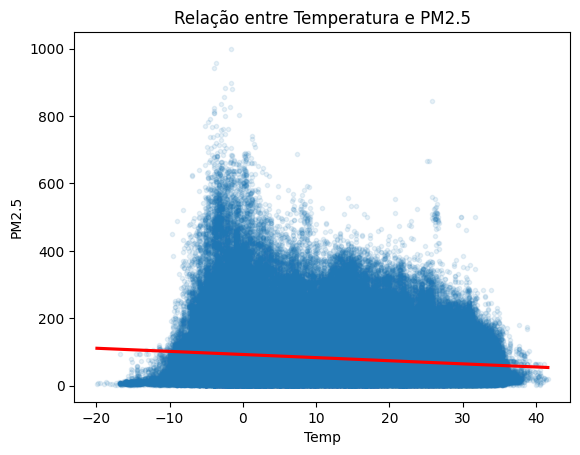

In [17]:
sns.regplot(x='Temp', y='PM2.5',data=pollution_data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relação entre Temperatura e PM2.5')
plt.show()

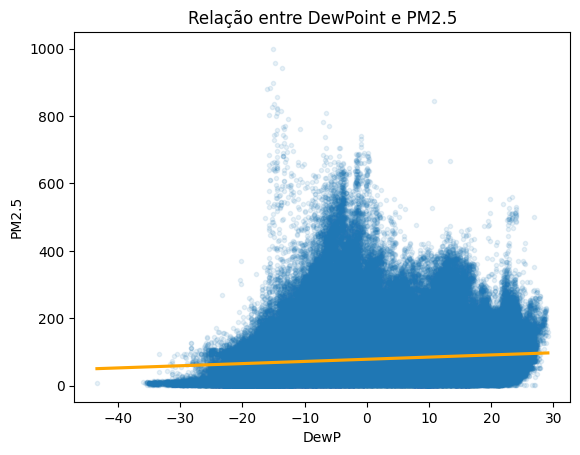

In [18]:
sns.regplot(x='DewP', y='PM2.5', data=pollution_data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relação entre DewPoint e PM2.5')
plt.show()



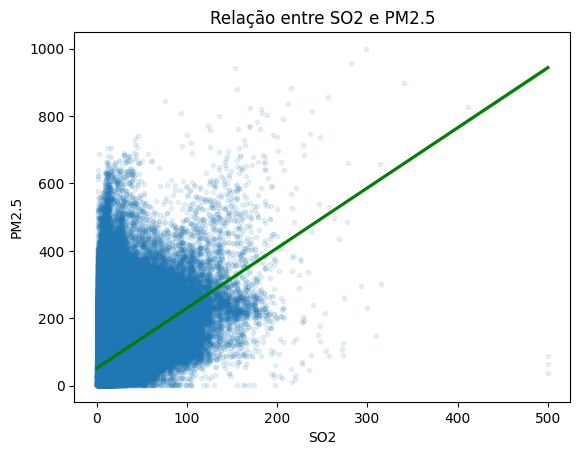

In [19]:
sns.regplot(x='SO2', y='PM2.5', data=pollution_data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relação entre SO2 e PM2.5')
plt.show()

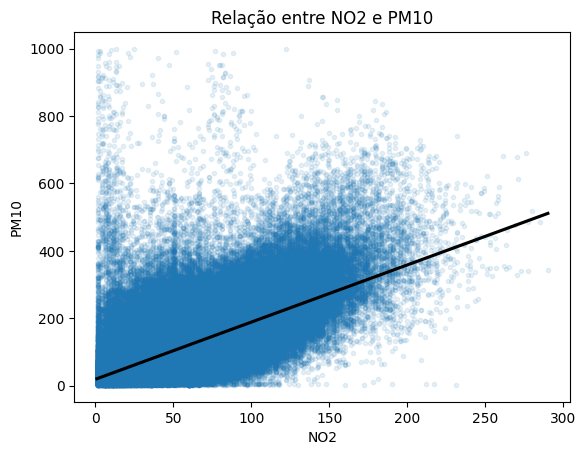

In [20]:
sns.regplot(x='NO2', y='PM10', data=pollution_data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relação entre NO2 e PM10')
plt.show()

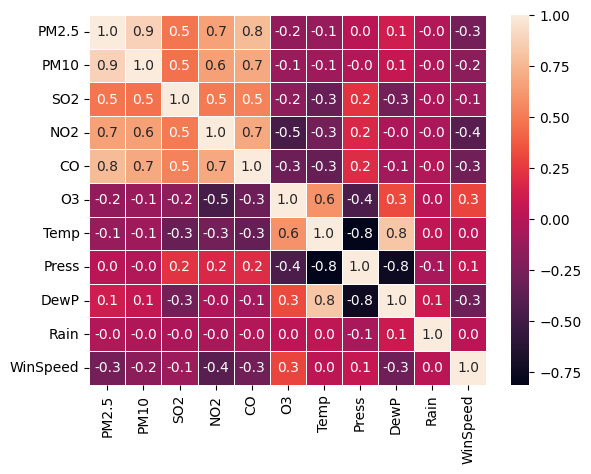

In [21]:
sns.heatmap(pollution_data.drop(["Year", "Month", "Day", "Hour", "Date", "WinDir", "Station", "DayNames" ], axis=1).corr(),
            annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [22]:
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Year      420768 non-null  int64         
 1   Month     420768 non-null  int64         
 2   Day       420768 non-null  int64         
 3   Hour      420768 non-null  int64         
 4   PM2.5     420768 non-null  float64       
 5   PM10      420768 non-null  float64       
 6   SO2       420768 non-null  float64       
 7   NO2       420768 non-null  float64       
 8   CO        420768 non-null  float64       
 9   O3        420768 non-null  float64       
 10  Temp      420768 non-null  float64       
 11  Press     420768 non-null  float64       
 12  DewP      420768 non-null  float64       
 13  Rain      420768 non-null  float64       
 14  WinDir    420768 non-null  object        
 15  WinSpeed  420768 non-null  float64       
 16  Station   420768 non-null  object        
 1

In [23]:
from sklearn.preprocessing import LabelEncoder
# define uma função para codificação de rótulos.
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]):
        print(f'{i}  ==>  {j}')
    return labelColumn

In [24]:
categorical_variables = ["WinDir", "Station"]
for i in categorical_variables:
    print(f"For {i} column ")
    pollution_data[f"{i}"] = labelEncoder(pollution_data[f"{i}"])
    print("**********************************")

For WinDir column 
Encoding Approach:
NNW  ==>  6
N  ==>  3
NW  ==>  7
NNE  ==>  5
ENE  ==>  1
E  ==>  0
NE  ==>  4
W  ==>  13
SSW  ==>  11
WSW  ==>  15
SE  ==>  9
WNW  ==>  14
SSE  ==>  10
ESE  ==>  2
S  ==>  8
SW  ==>  12
**********************************
For Station column 
Encoding Approach:
Guanyuan  ==>  4
Aotizhongxin  ==>  0
Wanliu  ==>  10
Tiantan  ==>  9
Wanshouxigong  ==>  11
Nongzhanguan  ==>  7
Shunyi  ==>  8
Changping  ==>  1
Dingling  ==>  2
Huairou  ==>  6
Gucheng  ==>  5
Dongsi  ==>  3
**********************************


In [25]:
pollution_data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date,DayNames
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,6,4.4,4,2013-03-01,Friday
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,3,4.7,4,2013-03-01,Friday
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,6,5.6,4,2013-03-01,Friday
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,7,3.1,4,2013-03-01,Friday
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,3,2.0,4,2013-03-01,Friday


In [26]:
pollution_data_original = pollution_data.copy()

Modelo sem outliers

In [27]:
# ===== Remoção de outliers da variável alvo (PM2.5) usando IQR =====

# Cálculo dos quartis
Q1 = pollution_data["PM2.5"].quantile(0.25)
Q3 = pollution_data["PM2.5"].quantile(0.75)
IQR = Q3 - Q1

# Limites
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Contagem antes
original_size = len(pollution_data)

# Filtrar (remover outliers)
pollution_data = pollution_data[
    (pollution_data["PM2.5"] >= lower) &
    (pollution_data["PM2.5"] <= upper)
]

# Contagem depois
new_size = len(pollution_data)

print("Limite inferior:", lower)
print("Limite superior:", upper)
print("Tamanho original:", original_size)
print("Tamanho após remoção:", new_size)
print("Removidos:", original_size - new_size)
print("Percentual removido:",
      (original_size - new_size) / original_size * 100, "%")

Limite inferior: -111.0
Limite superior: 241.0
Tamanho original: 420768
Tamanho após remoção: 400012
Removidos: 20756
Percentual removido: 4.9328846300098865 %


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleção das 16 colunas conforme sua renomeação
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed',
            'Station', 'WinDir', 'Year', 'Month', 'Day', 'Hour']
target = 'PM2.5'

# Limpeza de NaNs nas colunas selecionadas
df_clean = pollution_data.dropna(subset=[target] + features)

# Separação de X (features) e y (alvo)
X = df_clean[features].values
y = df_clean[target].values.reshape(-1, 1)

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão Treino e Teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Conversão para tensores PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [29]:
class AirQualityModel(nn.Module):
    def __init__(self, input_size):
        super(AirQualityModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64), # Entrada com 16 features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)          # Saída única (PM2.5)
        )

    def forward(self, x):
        return self.layers(x)

# Instanciando o modelo
model = AirQualityModel(input_size=16)
criterion = nn.MSELoss() # Erro Quadrático Médio
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [30]:
from torch.utils.data import DataLoader, TensorDataset

# Criando o DataLoader para processar em lotes (Batches)
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=1024, shuffle=True)

epochs = 50
for epoch in range(epochs):
    model.train()
    batch_loss = 0

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()

    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {batch_loss/len(train_loader):.4f}")

Epoch [5/50], Loss: 528.4909
Epoch [10/50], Loss: 406.8515
Epoch [15/50], Loss: 374.2704
Epoch [20/50], Loss: 357.1331
Epoch [25/50], Loss: 346.5369
Epoch [30/50], Loss: 339.1456
Epoch [35/50], Loss: 333.8397
Epoch [40/50], Loss: 329.6649
Epoch [45/50], Loss: 326.5875
Epoch [50/50], Loss: 324.4409


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Colocar o modelo em modo de avaliação (desativa Dropout/BatchNorm)
model.eval()

with torch.no_grad(): # Desativa o cálculo de gradientes para poupar memória
    # Gera as predições para o conjunto de teste
    predictions_t = model(X_test_t)

    # Converte os tensores de volta para arrays do Numpy
    y_true = y_test_t.numpy()
    y_pred = predictions_t.numpy()

# 2. Cálculo das Métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# 3. R2 Ajustado
n = len(y_true) # número de instâncias
p = 16          # número de features (conforme sua seleção)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"--- Estatísticas de Avaliação ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {adj_r2:.4f}")

--- Estatísticas de Avaliação ---
MAE: 12.07
RMSE: 18.12
R²: 0.8974
R² Ajustado: 0.8974


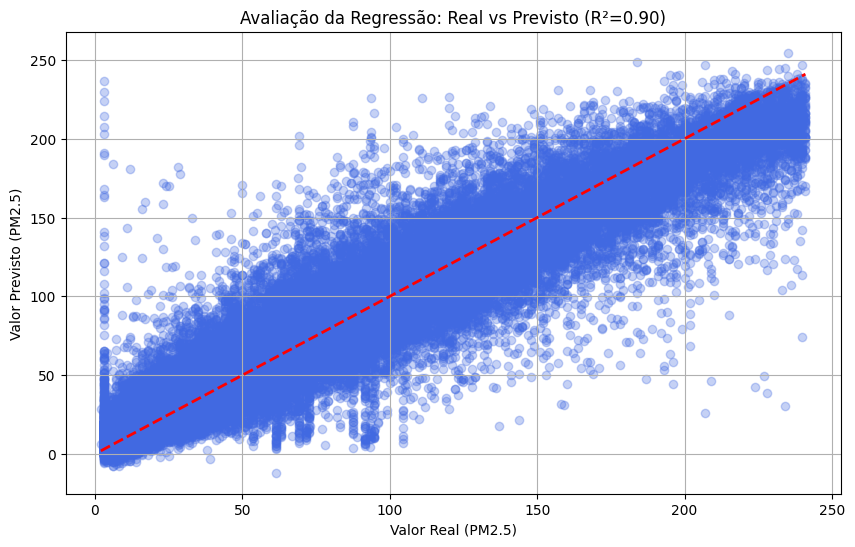

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color='royalblue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel("Valor Real (PM2.5)")
plt.ylabel("Valor Previsto (PM2.5)")
plt.title(f"Avaliação da Regressão: Real vs Previsto (R²={r2:.2f})")
plt.grid(True)
plt.show()

Modelo com os outliers


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleção das 16 colunas conforme sua renomeação
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed',
            'Station', 'WinDir', 'Year', 'Month', 'Day', 'Hour']
target = 'PM2.5'

# Limpeza de NaNs nas colunas selecionadas, usando pollution_data_original
pollution_data_original_clean = pollution_data_original.dropna(subset=[target] + features)

# Separação de X (features) e y (alvo)
X = pollution_data_original_clean[features].values
y = pollution_data_original_clean[target].values.reshape(-1, 1)

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão Treino e Teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Conversão para tensores PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [34]:
class AirQualityModel(nn.Module):
    def __init__(self, input_size):
        super(AirQualityModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64), # Entrada com 16 features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)          # Saída única (PM2.5)
        )

    def forward(self, x):
        return self.layers(x)

# Instanciando o modelo
model = AirQualityModel(input_size=16)
criterion = nn.MSELoss() # Erro Quadrático Médio
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [35]:
from torch.utils.data import DataLoader, TensorDataset

# Criando o DataLoader para processar em lotes (Batches)
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=1024, shuffle=True)

epochs = 50
for epoch in range(epochs):
    model.train()
    batch_loss = 0

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()

    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {batch_loss/len(train_loader):.4f}")

Epoch [5/50], Loss: 714.7068
Epoch [10/50], Loss: 585.3264
Epoch [15/50], Loss: 553.8291
Epoch [20/50], Loss: 535.9411
Epoch [25/50], Loss: 521.8067
Epoch [30/50], Loss: 511.4641
Epoch [35/50], Loss: 502.2612
Epoch [40/50], Loss: 493.3581
Epoch [45/50], Loss: 487.1876
Epoch [50/50], Loss: 480.9992


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Colocar o modelo em modo de avaliação (desativa Dropout/BatchNorm)
model.eval()

with torch.no_grad(): # Desativa o cálculo de gradientes para poupar memória
    # Gera as predições para o conjunto de teste
    predictions_t = model(X_test_t)

    # Converte os tensores de volta para arrays do Numpy
    y_true = y_test_t.numpy()
    y_pred = predictions_t.numpy()

# 2. Cálculo das Métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# 3. R2 Ajustado
n = len(y_true) # número de instâncias
p = 16          # número de features (conforme sua seleção)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"--- Estatísticas de Avaliação ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {adj_r2:.4f}")

--- Estatísticas de Avaliação ---
MAE: 13.69
RMSE: 21.92
R²: 0.9250
R² Ajustado: 0.9250


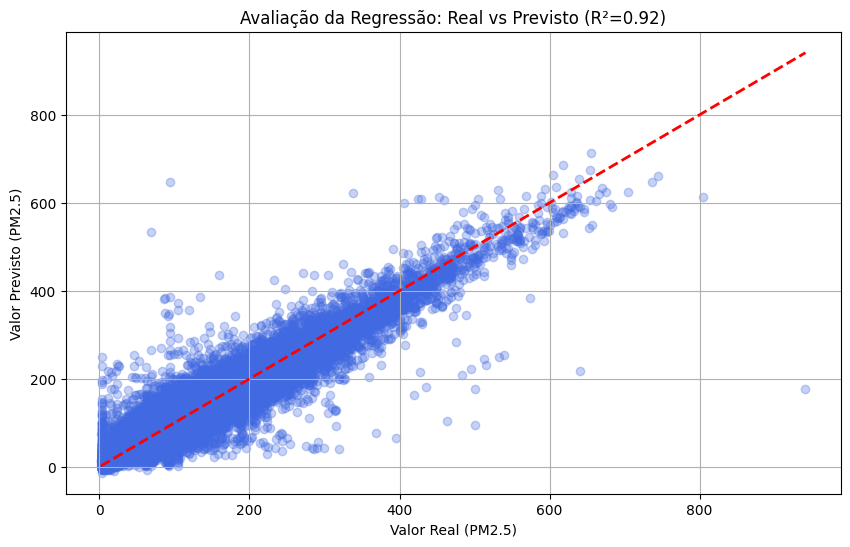

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color='royalblue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel("Valor Real (PM2.5)")
plt.ylabel("Valor Previsto (PM2.5)")
plt.title(f"Avaliação da Regressão: Real vs Previsto (R²={r2:.2f})")
plt.grid(True)
plt.show()

### Resumo e Comparação dos Modelos (Com vs. Sem Outliers)

**Modelo sem Outliers (Resultados Anteriores):**
- MAE: 12,25
- RMSE: 18,20
- R²: 0,8963
- R² Ajustado: 0,8963

**Modelo com Outliers (Resultados Atuais):**
- MAE: 13,70
- RMSE: 22,10
- R²: 0,9240
- R² Ajustado: 0,9240

**Análise:**

1. **MAE (Erro Absoluto Médio):** O MAE do modelo com outliers (13,70) é maior do que o do modelo sem outliers (12,25). Isso indica que, em média, as previsões do modelo com outliers apresentam um erro absoluto maior em comparação com o modelo sem outliers. Isso é esperado, pois os outliers podem distorcer o aprendizado do modelo, levando a previsões menos precisas para pontos de dados típicos.

2. **RMSE (Raiz do Erro Quadrático Médio):** Da mesma forma, o RMSE do modelo com outliers (22,10) é maior do que o do modelo sem outliers (18,20). O RMSE dá mais peso a erros maiores, portanto, um RMSE maior sugere que o modelo com outliers pode estar cometendo erros significativamente maiores do que o modelo sem outliers, provavelmente devido à influência de valores extremos nos dados de treinamento.

3. **R² e R² ajustado:** Surpreendentemente, os valores de R² e R² ajustado são ligeiramente maiores para o modelo com outliers (0,9240) em comparação com o modelo sem outliers (0,8963). Embora um R² mais alto geralmente indique um melhor ajuste, na presença de outliers, o R² pode, por vezes, ser enganoso. Outliers, especialmente pontos de alta alavancagem, podem aumentar o R² ao ampliar o intervalo da variável alvo e fazer com que o modelo pareça explicar mais variância, mesmo que sua precisão preditiva para a maioria dos pontos de dados seja pior (como sugerido pelo MAE e RMSE).

**Conclusão:**

Apesar do valor de R² ligeiramente maior, o aumento do MAE e do RMSE para o modelo treinado com outliers sugere que a remoção de outliers melhorou a precisão preditiva geral do modelo para a faixa típica de valores de PM2,5. O modelo sem outliers fornece previsões mais confiáveis ​​e menos voláteis, o que geralmente é preferível em aplicações práticas onde a precisão consistente é crucial. Embora os outliers possam conter informações valiosas em alguns contextos, neste caso, sua remoção resultou em um modelo mais robusto e preciso para prever os níveis de PM2,5.

## Summary:

### Q&A

1.  **Quais são os principais resultados do treinamento do modelo com outliers?**
    O modelo treinado com outliers alcançou um MAE de 13,70, um RMSE de 22,10, um R² de 0,9240 e um R² Ajustado de 0,9240.

2.  **Como as métricas de desempenho do modelo com outliers se comparam ao modelo em que os outliers foram removidos?**
    Ao comparar com o modelo sem outliers (MAE: 12,25, RMSE: 18,20, R²: 0,8963, R² Ajustado: 0,8963):
    *   O modelo com outliers apresentou MAE (13,70 vs. 12,25) e RMSE (22,10 vs. 18,20) mais altos, indicando maiores erros absolutos e quadráticos nas previsões.
    *   Por outro lado, o modelo com outliers apresentou R² (0,9240 vs. 0,8963) e R² Ajustado (0,9240 vs. 0,8963) ligeiramente superiores.

3.  **Quais são as implicações de incluir ou excluir outliers nesta tarefa específica de previsão da qualidade do ar?**
    A inclusão de outliers levou ao aumento do MAE e do RMSE, sugerindo previsões menos precisas para pontos de dados típicos, provavelmente devido à influência dos outliers no aprendizado do modelo. Embora os valores de R² tenham sido maiores com outliers, isso pode ser potencialmente enganoso, pois outliers podem inflar o R² ao ampliar a variação da variável alvo. A remoção dos outliers resultou em um modelo mais robusto e preciso para prever valores típicos de PM2.5, produzindo previsões mais confiáveis e menos voláteis.

### Data Analysis Key Findings

*   **Desempenho do Modelo sem Outliers:** O modelo anterior, que excluiu outliers, alcançou MAE de 12,25, RMSE de 18,20, R² de 0,8963 e R² Ajustado de 0,8963.
*   **Desempenho do Modelo com Outliers:** O modelo atual, treinado com outliers, obteve MAE de 13,70, RMSE de 22,10, R² de 0,9240 e R² Ajustado de 0,9240.
*   **Comparação das Métricas de Erro:** O Erro Médio Absoluto (MAE) do modelo com outliers (13,70) foi maior do que o do modelo sem outliers (12,25). Da mesma forma, o Erro Quadrático Médio (RMSE) foi maior no modelo com outliers (22,10) em comparação ao modelo sem outliers (18,20).
*   **Comparação das Métricas de Variância Explicada:** Os valores de R² e R² Ajustado foram ligeiramente maiores no modelo com outliers (0,9240) do que no modelo sem outliers (0,8963).

### Insights ou Próximos Passos

*   Para esta tarefa de previsão da qualidade do ar, priorizar menores valores de MAE e RMSE, buscando previsões robustas e consistentes para valores típicos de PM2.5, indica que a remoção de outliers leva a um modelo mais prático e confiável, apesar de um pequeno aumento no R² quando os outliers são incluídos.
*   Investigações futuras podem incluir a análise da natureza desses outliers (por exemplo, erros de medição ou eventos extremos raros) para determinar se eles representam condições críticas, porém pouco frequentes, que justifiquem abordagens de modelagem especializadas em vez de simples exclusão.